# Deutsch Algorithm

In [1]:
%pip install qiskit[visualization]

Note: you may need to restart the kernel to use updated packages.


First we'll define a quantum circuit that implements a query gate for 
one of the four functions f1, f2, f3, or f4 
from one bit to one bit: 
- f1: constant function that maps 0 and 1 to 0.
- f2: function that maps 0 to 0 and 1 to 1.
- f3: function that maps 0 to 1 and 1 to 0.
- f4: constant function that maps 0 and 1 to 1.
    
As was discussed, 
the implementation of query gates is not really a part of 
Deutsch's algorithm itself — here we're essentially just showing 
one way to prepare the input (in the form of a circuit implementation of a query gate).

In [2]:
from qiskit import QuantumCircuit

def deutsch_function(case: int):
    """
    Generate a valid Deutsch function as a `QuantumCircuit`.
    """
    if case not in [1, 2, 3, 4]:
        raise ValueError("`case` must be 1, 2, 3, or 4.")
    
    f = QuantumCircuit(2)
    if case in [2, 3]:
        f.cx(0, 1)
    if case in [3, 4]:
        f.x(1)
    return f

We can see what each circuit looks like using the draw method.

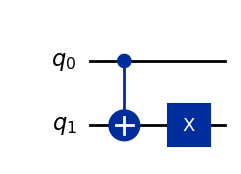

In [3]:
display(deutsch_function(3).draw('mpl'))

Next we will create the actual quantum circuit for Deutsch's algorithm, substituting the query gate with a quantum circuit implementation given as an argument. Shortly we'll plug in one of the four circuits defined by the function deutsch_function we defined earlier. Barriers are included to show the visual separation between the query gate implementation and the rest of the circuit, but they aren't necessary and can safely be removed.

In [4]:
def compile_circuit(function: QuantumCircuit):
    """
    Compiles a circuit for use in Deutsch's algorithm.
    """
    n = function.num_qubits - 1
    qc = QuantumCircuit(n + 1, n)

    qc.x(n)
    qc.h(range(n + 1))

    qc.barrier()
    qc.compose(function, inplace=True)
    qc.barrier()

    qc.h(range(n))
    qc.measure(range(n), range(n))

    return qc

Again we can see what the circuit looks like using the draw method.

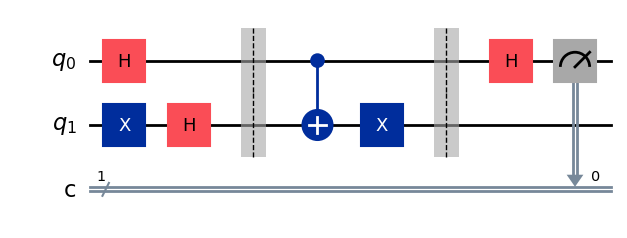

In [5]:
display(compile_circuit(deutsch_function(3)).draw('mpl'))

Finally, we'll create a function that runs the circuit just defined one time and outputs the appropriate result: "constant" or "balanced."

In [6]:
%pip install qiskit_aer

Note: you may need to restart the kernel to use updated packages.


In [7]:
from qiskit_aer import AerSimulator

def deutsch_algorithm(function: QuantumCircuit):
    """
    Determine if a Deutsch function is constant or balanced.
    """
    qc = compile_circuit(function)

    result = AerSimulator().run(qc, shots=1, memory=True).result()
    measurements = result.get_memory()
    if measurements[0] == "0":
        return "constant"
    return "balanced"

The following code cell runs Deutsch's algorithm on any one of the four functions defined above.

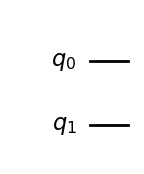

'constant'

In [9]:
# Replace ? 
f = deutsch_function(1)
display(f.draw('mpl'))
display(deutsch_algorithm(f))

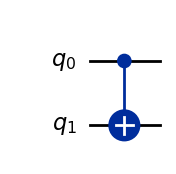

'balanced'

In [10]:
f = deutsch_function(2)
display(f.draw('mpl'))
display(deutsch_algorithm(f))

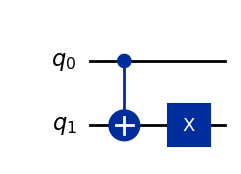

'balanced'

In [11]:
f = deutsch_function(3)
display(f.draw('mpl'))
display(deutsch_algorithm(f))

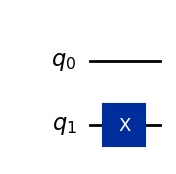

'constant'

In [12]:
f = deutsch_function(4)
display(f.draw('mpl'))
display(deutsch_algorithm(f))

# End of Notebook